# 5 Modeling

### 5.1 Import Modules and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [31]:
Train70 = open('../Step 4 - Pre-Processing/Train70Data.p','rb')
X_train70, y_train70 = pickle.load(Train70)
Train70.close()

Test30 = open('../Step 4 - Pre-Processing/Test30Data.p','rb')
X_test30, y_test30 = pickle.load(Test30)
Test30.close()

Train50 = open('../Step 4 - Pre-Processing/Train50Data.p','rb')
X_train50, y_train50 = pickle.load(Train50)
Train50.close()

Test50 = open('../Step 4 - Pre-Processing/Test50Data.p','rb')
X_test50, y_test50 = pickle.load(Test50)
Test50.close()

X_train70segement_id = X_train70[['segment_id']]
X_test30segement_id = X_test30[['segment_id']]
X_train50segement_id = X_train50[['segment_id']]
X_test50segement_id = X_test50[['segment_id']]

X_train70 = X_train70.drop('segment_id',axis=1)
X_test30 = X_test30.drop('segment_id',axis=1)
X_train50 = X_train50.drop('segment_id',axis=1)
X_test50 = X_test50.drop('segment_id',axis=1)

print(X_train70.shape, y_train70.shape)

(3101, 240) (3101, 1)


## 5.2 Ridge Regression

In [32]:
ridReg = Ridge()
params = {'alpha' : [x/10 for x in range(0,11)], 'max_iter' : [10,20,50,75,100], 'fit_intercept' : [True,False]}
rSearchCV = RandomizedSearchCV(ridReg, params, cv=5, n_jobs = -1)

rSearchCV.fit(X_train70, y_train70)
y_predTest30 = rSearchCV.predict(X_test30)
MAEScore = mean_absolute_error(y_test30,y_predTest30)
print('A train test split of 70/30 had a best params of %s with a score of %.3f and a MAE : %.3f on the test data.\n' % (rSearchCV.best_params_, rSearchCV.best_score_,MAEScore))

rSearchCV.fit(X_train50, y_train50)
y_predTest50 = rSearchCV.predict(X_test50)
MAEScore = mean_absolute_error(y_test50,y_predTest50)
print('A train test split of 50/50 had a best params of %s with a score of %.3f and a MAE : %.3f on the test data.\n' % (rSearchCV.best_params_, rSearchCV.best_score_,MAEScore))

A train test split of 70/30 had a best params of {'max_iter': 50, 'fit_intercept': False, 'alpha': 0.7} with a score of -1.064 and a MAE : 0.749 on the test data.

A train test split of 50/50 had a best params of {'max_iter': 100, 'fit_intercept': True, 'alpha': 0.8} with a score of -0.715 and a MAE : 0.868 on the test data.



Using Ridge regression and randomized search CV, we receieved a minimum MAE of 0.749 with our 70/30 split data. This is a lower than the 50/50 split, which just gives us an extra indicator that our model isn't doing something wrong since feeding it more data should bring the MAE down.

## 5.3 Lasso Regression

In [33]:
lasReg = Lasso()
params = {'alpha' : [x/10 for x in range(0,11)], 'max_iter' : [10,20,50,75,100], 'fit_intercept' : [True,False]}
gSearchCV = RandomizedSearchCV(lasReg, params, cv=5, n_jobs = -1)

rSearchCV.fit(X_train70, y_train70)
y_predTest30 = rSearchCV.predict(X_test30)

MAEScore = mean_absolute_error(y_test30,y_predTest30)
print('A train test split of 70/30 had a best params of %s with a score of %.3f and a MAE : %.3f on the test data.\n' % (rSearchCV.best_params_, rSearchCV.best_score_,MAEScore))

rSearchCV.fit(X_train50, y_train50)
y_predTest50 = rSearchCV.predict(X_test50)

MAEScore = mean_absolute_error(y_test50,y_predTest50)
print('A train test split of 50/50 had a best params of %s with a score of %.3f and a MAE : %.3f on the test data.\n' % (rSearchCV.best_params_, rSearchCV.best_score_,MAEScore))

A train test split of 70/30 had a best params of {'max_iter': 100, 'fit_intercept': False, 'alpha': 1.0} with a score of -0.802 and a MAE : 0.746 on the test data.

A train test split of 50/50 had a best params of {'max_iter': 20, 'fit_intercept': True, 'alpha': 1.0} with a score of -0.595 and a MAE : 0.850 on the test data.



With Lasso regression, we get something very close to the Ridge regression. We may need to look at another model to help see if we can bring the MAE down lower.

## 5.4 SVR

In [34]:
svrModel = SVR()
params = {'kernel' : ['linear', 'poly', 'rbf'], 'degree' : [1,2,3,4,5,6,7,8], 'C' : [1,5,10,20,25,50],'epsilon' : [0.1,0.01,0.001,0.05]}
rSearchCV = RandomizedSearchCV(svrModel, params, cv=5, n_jobs = -1)

rSearchCV.fit(X_train70, y_train70)
y_predTest30 = rSearchCV.predict(X_test30)

MAEScore = mean_absolute_error(y_test30,y_predTest30)
print('A train test split of 70/30 had a best params of %s with a score of %.3f and a MAE : %.3f on the test data.\n' % (rSearchCV.best_params_, rSearchCV.best_score_,MAEScore))

rSearchCV.fit(X_train50, y_train50)
y_predTest50 = rSearchCV.predict(X_test50)

MAEScore = mean_absolute_error(y_test50,y_predTest50)
print('A train test split of 50/50 had a best params of %s with a score of %.3f and a MAE : %.3f on the test data.\n' % (rSearchCV.best_params_, rSearchCV.best_score_,MAEScore))

A train test split of 70/30 had a best params of {'kernel': 'rbf', 'epsilon': 0.001, 'degree': 4, 'C': 25} with a score of 0.630 and a MAE : 0.442 on the test data.

A train test split of 50/50 had a best params of {'kernel': 'rbf', 'epsilon': 0.001, 'degree': 8, 'C': 10} with a score of 0.555 and a MAE : 0.470 on the test data.



SVR gave us a MAE of 0.442 which is significantly lower than the Ridge and Lasso regression. It seems like SVR may be the model we choose going forward.

## 5.6 Conclusion

In [35]:
model1 = Ridge(max_iter = 50, fit_intercept = False, alpha = 0.7)
model1.fit(X_train70,y_train70)

y_pred = model1.predict(X_test30)
print('MAE : %.3f' % (mean_absolute_error(y_test30,y_pred)))

MAE : 0.749


In [36]:
model2 = Lasso(max_iter = 100, fit_intercept = False, alpha = 1.0)
model2.fit(X_train70,y_train70)

y_pred = model2.predict(X_test30)
print('MAE : %.3f' % (mean_absolute_error(y_test30,y_pred)))

MAE : 0.847


In [37]:
model3 = SVR(kernel = 'rbf', epsilon = 0.001, degree = 4, C = 25)
model3.fit(X_train70,y_train70)

y_pred = model3.predict(X_test30)
print('MAE : %.3f' % (mean_absolute_error(y_test30,y_pred)))

MAE : 0.442


|Model|Split Size|MAE|
|------|------|------|
|Ridge|70/30|0.749|
|Lasso|70/30|0.847|
|Support Vector|70/30|0.442|

Training models with the best parameters found from our randomized search confirms that SVR provides the lowest MAE. While SVR is going to be our final model, we can still take a look at the others and find out how those models were looking at our data and see what features were the most improtant.

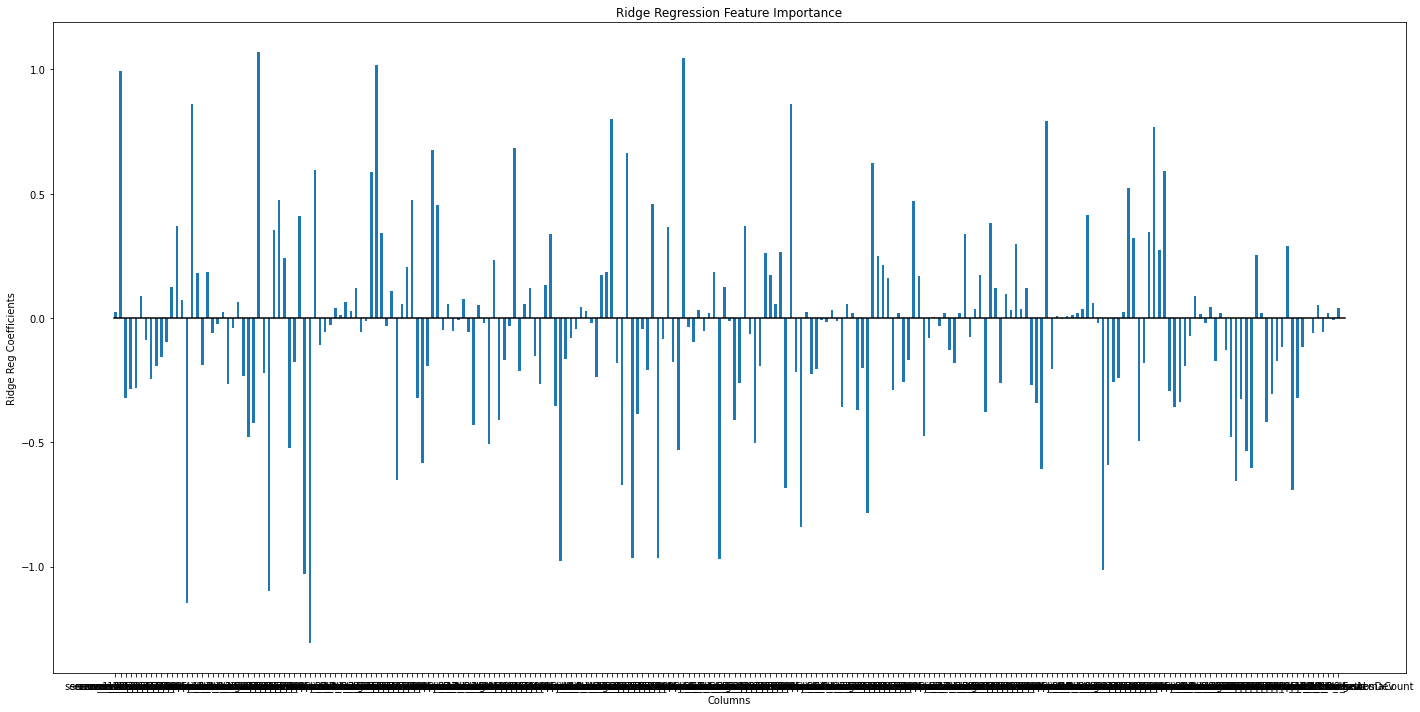

In [38]:
x = np.arange(1,len(X_train70.columns) + 1)

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.plot([0.75,241.25],[0,0], c = 'black')
plt.bar(x,model1.coef_[0],width = 0.5,tick_label = X_train70.columns)
plt.title('Ridge Regression Feature Importance')
plt.xlabel('Columns')
plt.ylabel('Ridge Reg Coefficients')

fig.tight_layout()
plt.show()

In [46]:
top10 = []
bottom10 = []
for i in range(0,10) :
    top10.append(sorted(zip(X_train70.columns,model1.coef_[0]), key = lambda x:x[1])[(-1 * i)-1])
    bottom10.append(sorted(zip(X_train70.columns,model1.coef_[0]), key = lambda x:x[1])[i])
    
print('The top 10 features based on Ridge regression :')
for i,j in top10 :
    print(i,j)

print('\nThe bottom 10 features based on Ridge regression :')
for i,j in bottom10 :
    print(i,j)

The top 10 features based on Ridge regression :
sensor_2_20percentile 1.0703106273772276
sensor_5_var 1.047005739387588
sensor_3_10percentile 1.0196170774279871
sensor_1_01percentile 0.9930715854649496
sensor_1_var 0.8617676703351951
sensor_6_99percentile 0.8594396413473736
sensor_5_01percentile 0.7991642142830743
sensor_8_std 0.7944557869321011
sensor_9_90percentile 0.7679272839683339
sensor_4_35percentile 0.6852200270832055

The bottom 10 features based on Ridge regression :
sensor_2_std -1.308603890985252
sensor_1_std -1.1464152787099156
sensor_2_35percentile -1.0970473038263804
sensor_2_95percentile -1.03065606691256
sensor_9_01percentile -1.0144280325507387
sensor_4_var -0.9793146106033286
sensor_5_meanAbsDev -0.9683632900449162
sensor_5_80percentile -0.9659066697862057
sensor_5_25percentile -0.9651351444814231
sensor_6_std -0.839251086323683


Looking at the coefficients of our Ridge regression, we see that 3 features for STD appear in the bottom 10 coefficients. Although a STD feature can be noticed in the top 10 features as well. There does not seem to be any obvious pattern that sticks out to certain feature metrics that lead to stronger relations. One thing noticed is that there are tons of percentiles that appear in the top 10 and bottom 10, although this could be most likely due to most features being percentiles of the dataset.

In [47]:
finalModelExport = open('finalModel.p','wb')
pickle.dump(model3,finalModelExport)
finalModelExport.close()